In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
#Keras
import keras
from keras import models
from keras import layers
from keras.models import Sequential       
from keras.layers.core import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [3]:
header=" "
for i in range(1, 11):
    header += f' .mfcc{i}'
header += ' label'
header = header.split()

In [4]:
file = open('data_mfcc_frame_level.csv', 'w', newline='')
label1='covid'
label2='healthy'


with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = range(1,141)
map(str,genres)
for g in genres:
    
    if (g==29 or g==124):
            continue
            
    for filename in os.listdir(f'{g}'):
        songname = f'{g}/{filename}'
        y, sr = librosa.load(songname)
        
        print("file number=",g)
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=10)
        mfcc=mfcc.T
        no_of_rows=len(mfcc)
        no_of_columns=mfcc.shape[1]
        for i in range (0,no_of_rows):
            mfcc_rows=" "
            mfcc_row=" "
            for j in range (0, no_of_columns):
                mfcc_row=mfcc[i,j].item()
                mfcc_rows+=f' {mfcc_row}'
            if (g<71):
                mfcc_rows+=f' {label1}'
            else:
                mfcc_rows+=f' {label2}'
            file = open('data_mfcc_frame_level.csv', 'a', newline='')
            with file:
                writer = csv.writer(file)
                writer.writerow(mfcc_rows.split())

file number= 1
file number= 2
file number= 3
file number= 4
file number= 5
file number= 6
file number= 7
file number= 8
file number= 9
file number= 10
file number= 11
file number= 12
file number= 13
file number= 14
file number= 15
file number= 16
file number= 17
file number= 18
file number= 19
file number= 20
file number= 21
file number= 22
file number= 23
file number= 24
file number= 25
file number= 26
file number= 27
file number= 28
file number= 30
file number= 31
file number= 32
file number= 33
file number= 34
file number= 35
file number= 36
file number= 37
file number= 38
file number= 39
file number= 40
file number= 41
file number= 42
file number= 43
file number= 44
file number= 45
file number= 46
file number= 47
file number= 48
file number= 49
file number= 50
file number= 51
file number= 52
file number= 53
file number= 54
file number= 55
file number= 56
file number= 57
file number= 58
file number= 59
file number= 60
file number= 61
file number= 62
file number= 63
file number= 64
f

In [2]:
data = pd.read_csv('data_mfcc_frame_level.csv')
data.head()

,.mfcc1,.mfcc2,.mfcc3,.mfcc4,.mfcc5,.mfcc6,.mfcc7,.mfcc8,.mfcc9,.mfcc10,label
0,-810.448425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,covid
1,-810.448425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,covid
2,-810.448425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,covid
3,-761.173218,62.656967,44.609657,22.863201,4.851740,-5.640286,-9.537222,-10.555969,-12.059358,-14.969872,covid
4,-714.304138,113.122772,60.233673,10.460440,-13.159238,-12.748011,-6.380317,-7.699214,-15.566404,-20.707510,covid


In [3]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)


scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
#we use this split for ANN
X_testmod,X_val,y_testmod,y_val=train_test_split(X_test,y_test,test_size=0.5,random_state=0)

#using ANN 
#1 hidden layers added
from keras import models
from keras import layers

#initialise the ANN, defines ANN as sequence of layers
model = models.Sequential()
#we will add the input layer and the 1st hidden layer
#here the .add adds different layers
#the first parameter specifies the number of nodes in the hidden layer. It is generally calculated as the average(number of input layers+number of output layers) 
#the rectifier function is used as the activation function for the hidden layer 
model.add(layers.Dense(14, activation='relu', input_shape=(X_train.shape[1],)))
#we will add another hidden layer 
#model.add(layers.Dense(14, activation='relu'))
#add the output layer
#output_dim=outcome for the output layer. Here it is set to 1 because the outcome is binary, i.e., covid or healthy
#the activation function used on the output layer is sigmoid. This is to get the probability of the outcome
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
#compile the ANN
#we will use Stochastic Gradient Descent to the entire ANN to find the optimal set of weights. There are many types of descent. we have used 'adam' algorithm as our stochastic gradient descent. 
#this 'adam' algorithm is based on loss function. For example, in simple linear regression the loss function is the sum of the difference between the real value and predicted value. For stochastic gradient descent, the the loss function is the logarithmic loss  
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
#Fit ANN to the training set
#NOTE: there is no standard rule to select batch_size or epochs. Generally the batch_size=10 and epochs=100
history = model.fit(X_train,
                    y_train,
                    epochs=40,
                    batch_size=20, validation_data=(X_val,y_val) )

Train on 24352 samples, validate on 3045 samples
Epoch 1/40
24352/24352 [==============================] - 2s 76us/step - loss: 0.6861 - accuracy: 0.5523 - val_loss: 0.6766 - val_accuracy: 0.5557
Epoch 2/40
24352/24352 [==============================] - 2s 63us/step - loss: 0.6692 - accuracy: 0.5802 - val_loss: 0.6676 - val_accuracy: 0.5915
Epoch 3/40
24352/24352 [==============================] - 2s 64us/step - loss: 0.6617 - accuracy: 0.5966 - val_loss: 0.6594 - val_accuracy: 0.6000
Epoch 4/40
24352/24352 [==============================] - 2s 63us/step - loss: 0.6568 - accuracy: 0.6012 - val_loss: 0.6552 - val_accuracy: 0.5987
Epoch 5/40
24352/24352 [==============================] - 2s 64us/step - loss: 0.6534 - accuracy: 0.6056 - val_loss: 0.6527 - val_accuracy: 0.5990
Epoch 6/40
24352/24352 [==============================] - 2s 63us/step - loss: 0.6509 - accuracy: 0.6089 - val_loss: 0.6500 - val_accuracy: 0.6013
Epoch 7/40
24352/24352 [==============================] - 2s 64us/ste

In [17]:
test_loss, test_acc = model.evaluate(X_testmod,y_testmod)
print('test_acc:, test_loss',test_acc, test_loss)

3044/3044 [==============================] - 0s 20us/step
test_acc:, test_loss 0.6540735960006714 0.6215719864183594


In [18]:
#predict the test set result
#predictions shows the probability of the outcome being covid or healthy
predictions = model.predict(X_testmod)
#it means that if predictions >0.5, the subject is healthy. Else he is a covid patient
#we get the predictions output as true and false
predictions=(predictions>0.5)
#the predictions values are converted to 0 and 1
predictions = np.multiply(predictions, 1)
#implement the confusion matrix
cm=confusion_matrix(y_testmod,predictions)
auc = roc_auc_score(y_testmod, predictions)

In [19]:
print("\n area under the curve=",auc)
print("\n confusion matrix is\n", cm)


 area under the curve= 0.6543772528070948

 confusion matrix is
 [[1016  558]
 [ 495  975]]


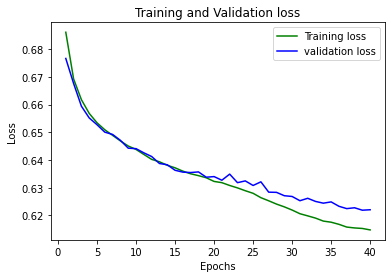

In [20]:
#Visualizing train and validation loss
loss_train = history.history['loss']
loss_val = history.history['val_loss']
loss_train=np.array(loss_train)
loss_val=np.array(loss_val)
epochs = range(1,41)
epochs=np.array(epochs)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

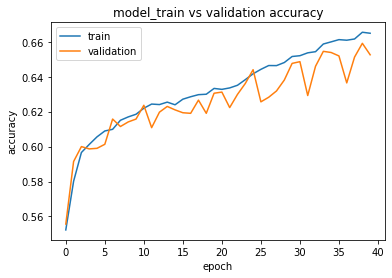

In [21]:
#Visualizing train and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
epoch=range(1,41)
plt.title('model_train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [6]:
#try SVM with scikit learn
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_pred,y_test)
auc = roc_auc_score(y_test, y_pred)

TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

#applying 5 cross validation
accuracies=cross_val_score(estimator=classifier,X=X_train, y=y_train, cv=5)
c=accuracies.mean()
d=accuracies.std()

In [7]:
print("mean of accuracies=",c,"\n mean of variance=",d,"\n accuracy=",acc,"\n sensitivity=",TPR,"\n specificity=",TNR,"\n area under the curve=",auc)
print("\n confusion matrix is\n", cm)

mean of accuracies= 0.5505914693549427 
 mean of variance= 0.0037361952945908004 
 accuracy= 0.5444243718180325 
 sensitivity= 0.4017013232514178 
 specificity= 0.6998284734133791 
 area under the curve= 0.5507648983323984

 confusion matrix is
 [[1275 1899]
 [ 875 2040]]


In [8]:
#try logistic regression with scikit learn
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_pred,y_test)
auc = roc_auc_score(y_test, y_pred)

TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

#applying 5 cross validation
accuracies=cross_val_score(estimator=classifier,X=X_train, y=y_train, cv=5)
c=accuracies.mean()
d=accuracies.std()

In [10]:
print("mean of accuracies=",c,"\n mean of variance=",d,"\n accuracy=",acc,"\n sensitivity=",TPR,"\n specificity=",TNR,"\n area under the curve=",auc)
print("\n confusion matrix is\n", cm)

mean of accuracies= 0.5551085690485997 
 mean of variance= 0.008152093128743751 
 accuracy= 0.5444243718180325 
 sensitivity= 0.6821045998739761 
 specificity= 0.4216123499142367 
 area under the curve= 0.5518584748941064

 confusion matrix is
 [[2165 1009]
 [1686 1229]]


In [11]:
#try naive bayes with scikit learn
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_pred,y_test)
auc = roc_auc_score(y_test, y_pred)

TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

#applying 5 cross validation
accuracies=cross_val_score(estimator=classifier,X=X_train, y=y_train, cv=5)
c=accuracies.mean()
d=accuracies.std()


In [13]:
print("mean of accuracies=",c,"\n mean of variance=",d,"\n accuracy=",acc,"\n sensitivity=",TPR,"\n specificity=",TNR,"\n area under the curve=",auc)
print("\n confusion matrix is\n", cm)

mean of accuracies= 0.5317021710617265 
 mean of variance= 0.009738449670825822 
 accuracy= 0.5444243718180325 
 sensitivity= 0.4344675488342785 
 specificity= 0.6380789022298456 
 area under the curve= 0.536273225532062

 confusion matrix is
 [[1379 1795]
 [1055 1860]]
